In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Set pandas display option and warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

# Define the function to convert date columns
def convert_date_columns(data):
    # Convert date columns to datetime format if present
    date_columns = ['gdte', 'pdte', 'updated_dts']
    for col in date_columns:
        if col in data.columns:
            data[col] = pd.to_datetime(data[col])
    return data

# Functions for validation and inspection
def inspect_data(data, name):
    print(f"--- First few rows of {name} ---")
    print(data.head(3))
    print("\n")

def check_missing_values(data, name):
    missing_values = data.isnull().sum()
    print(f"--- Missing values in {name} ---")
    print(missing_values)
    print("\n")

    plt.figure(figsize=(10, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title(f'Missing Values Heatmap for {name}')
    plt.show()

def check_date_conversion(data, name):
    date_columns = ['gdte', 'pdte', 'updated_dts']
    for col in date_columns:
        if col in data.columns:
            print(f"Data type of {col} in {name}: {data[col].dtype}")

def display_summary_statistics(data, name):
    print(f"--- Summary statistics for {name} ---")
    print(data.describe())
    print("\n")

def handle_missing_values(data):
    missing_values = data.isnull().sum()
    print("Missing Values:")
    print(missing_values)
    data.fillna(method='ffill', inplace=True)  # Forward fill missing values
    return data

In [2]:
ldos_1 = pd.read_csv("./ML_Project/ML_Project_ldos_archive_1yr (1).csv", sep=",", index_col=0)
ldos_2 = pd.read_csv("./ML_Project/ML_Project_ldos_archive_1yr (2).csv", sep=",", index_col=0)
ldos = pd.concat([ldos_1, ldos_2], ignore_index=True)
nav830 = pd.read_csv("./ML_Project/ML_Project_tbl_nav830_hist_1yr.csv", sep=",")
# Ready to go!

In [3]:
# Conversions and Formatting
ldos = convert_date_columns(ldos)
nav830 = convert_date_columns(nav830)

--- First few rows of ldos ---
                      updated_ts volume  company    rpl  edi  davg  dvol  \
0  2022-07-18 08:04:26.226793000    Low       65  Other  866   0.0   0.0   
1  2022-07-18 08:04:26.226793000    Low       65  Other  866   0.0   0.0   
2  2022-07-18 08:04:26.226793000    Low       65  Other  866   0.0   0.0   

   item          description  item_type item_group product_type signal_code  \
0  1001  Verificar Taladrado        1.0       011H          011         NaN   
1  1002  Verificar Taladrado        1.0       011H          011         NaN   
2  1003  Verificar Taladrado        1.0       011H          011         NaN   

  abc_class  last_transaction_date  min_order_qty  order_qty_multiple  \
0         C  2022-07-15 00:00:00.0            1.0                 1.0   
1         C  2022-07-15 00:00:00.0            1.0                 1.0   
2         C  2022-05-18 00:00:00.0            1.0                 1.0   

   safety_stock  stock_at_mrp supplier_alias trim(x_co

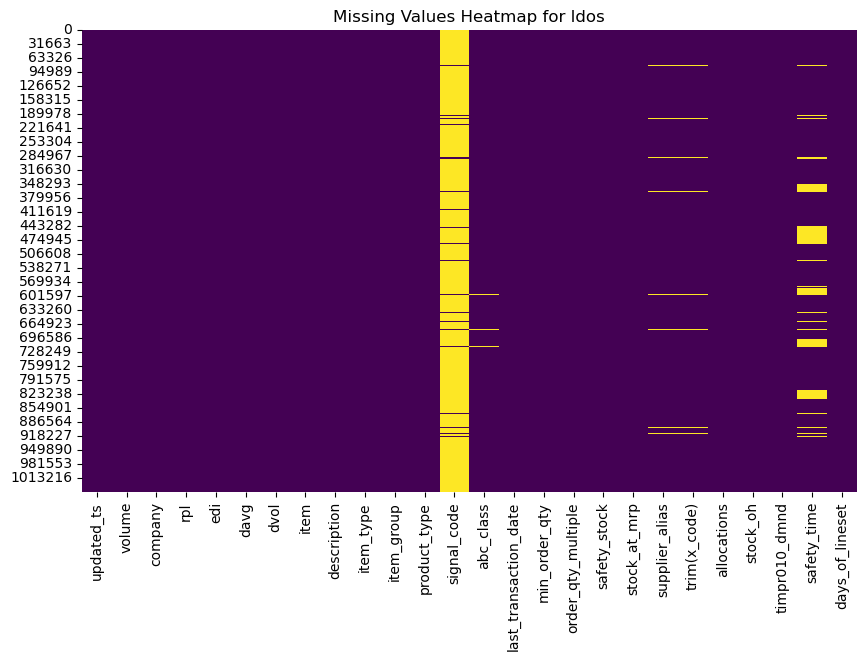

--- Missing values in nav830 ---
updated           0
qualifier         0
bano              0
item              0
cono              0
cont              0
supplier_alias    0
csel              0
schn              0
seqn              0
isdt              0
cuqp              0
lded              0
lreq              0
yreq              0
cplb              0
ncmp              0
orga              0
edis              0
tme               0
wk01              0
wk02              0
wk03              0
wk04              0
wk05              0
wk06              0
wk07              0
wk08              0
wk09              0
wk10              0
wk11              0
wk12              0
flx               0
mth4              0
mth5              0
mth6              0
dtype: int64




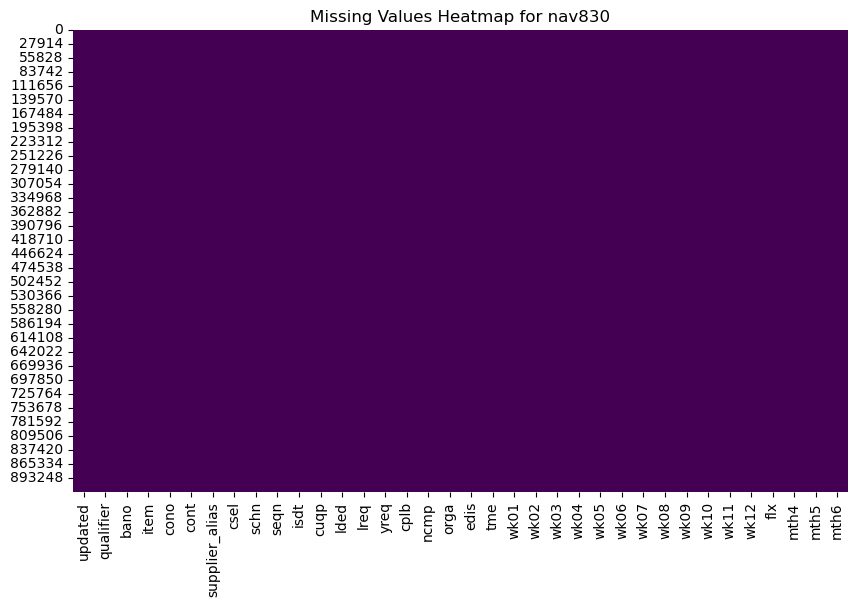

--- Summary statistics for ldos ---
         company           edi          davg          dvol  item_type  \
count  1044874.0  1.044874e+06  1.044874e+06  1.044874e+06  1044874.0   
mean        65.0  8.546011e+02  4.556587e+01  1.891092e+00        1.0   
std          0.0  1.588811e+01  1.440565e+03  5.978136e+01        0.0   
min         65.0  8.300000e+02 -1.653846e+00 -6.360947e-02        1.0   
25%         65.0  8.300000e+02  0.000000e+00  0.000000e+00        1.0   
50%         65.0  8.620000e+02  2.608696e-01  1.041667e-02        1.0   
75%         65.0  8.660000e+02  3.884615e+00  1.616000e-01        1.0   
max         65.0  8.660000e+02  3.405448e+05  1.418937e+04        1.0   

       min_order_qty  order_qty_multiple  safety_stock  stock_at_mrp  \
count   1.044874e+06        1.044874e+06  1.044874e+06  1.044874e+06   
mean    2.774942e+00        1.189500e+02  8.065224e+00  5.778934e+02   
std     8.222826e+01        3.796100e+03  1.913470e+02  2.026229e+04   
min     0.000000e+

In [4]:
inspect_data(ldos, "ldos")
inspect_data(nav830, "nav830")

check_missing_values(ldos, "ldos")
check_missing_values(nav830, "nav830")

check_date_conversion(ldos, "ldos")
check_date_conversion(nav830, "nav830")

display_summary_statistics(ldos, "ldos")
display_summary_statistics(nav830, "nav830")

ldos = handle_missing_values(ldos)
nav830 = handle_missing_values(nav830)

In [5]:
# Parse the 'updated_ts' column in ldos and set it to the corresponding Sunday in 'yyyy-MM-dd' format
ldos['updated_ts'] = pd.to_datetime(ldos['updated_ts'], format='%Y-%m-%d', errors='coerce', infer_datetime_format=True)
ldos['updated'] = ldos['updated_ts'] - pd.to_timedelta((ldos['updated_ts'].dt.weekday + 1) % 7, unit='D')
ldos['updated'] = ldos['updated'].dt.strftime('%Y-%m-%d')

# Reset the index of nav830 to remove the 'updated' column from the index
nav830 = nav830.reset_index(drop=True)

# Parse the 'updated' column in nav830 and set it to the corresponding Sunday in 'yyyy-MM-dd' format
nav830['updated'] = pd.to_datetime(nav830['updated'], format='%Y-%m-%d', errors='coerce', infer_datetime_format=True)
nav830['updated'] = nav830['updated'] - pd.to_timedelta((nav830['updated'].dt.weekday + 1) % 7, unit='D')
nav830['updated'] = nav830['updated'].dt.strftime('%Y-%m-%d')

# Update the 'company' column in nav830
nav830['company'] = nav830['ncmp']

# Merge ldos and nav830 DataFrames based on specified columns
merged_df = pd.merge(ldos, nav830, on=['item', 'company', 'supplier_alias', 'updated'])

# Remove duplicates from merged_df by grouping and keeping only the first occurrence
merged_df = merged_df.groupby(['item', 'company', 'supplier_alias', 'csel', 'volume', 'edi', 'item_group', 'updated']).first().reset_index()

# Display the merged DataFrame after removing duplicates
print("\nMerged DataFrame (with duplicates removed):")
print(merged_df.shape)


Merged DataFrame (with duplicates removed):
(913952, 60)


In [6]:
# Check uniqueness
grouping = ['item', 'company', 'supplier_alias', 'csel', 'volume', 'edi', 'item_group', 'updated']

unique_check = merged_df.groupby(grouping)['updated'].nunique() == merged_df.groupby(grouping).size()

# Check if 'updated' is unique for all groups
if unique_check.all():
    print(f"The 'updated' column is unique for each group of {grouping}.")
else:
    print(f"The 'updated' column is not unique for some groups of {grouping}.")
    non_unique_items = unique_check.index[~unique_check].tolist()
    print("Items with non-unique 'updated':", non_unique_items)


The 'updated' column is unique for each group of ['item', 'company', 'supplier_alias', 'csel', 'volume', 'edi', 'item_group', 'updated'].


In [7]:
# Ensure Date
merged_df['updated'] = pd.to_datetime(merged_df['updated'])

# Creating a Unique Identifier
merged_df['cohort_id'] = merged_df['item'].astype(str) + "_" + \
                        merged_df['company'].astype(str) + "_" + \
                        merged_df['supplier_alias'].astype(str) + "_" + \
                        merged_df['csel'].astype(str) + "_" + \
                        merged_df['volume'].astype(str) + "_" + \
                        merged_df['edi'].astype(str) + "_" + \
                        merged_df['item_group'].astype(str)
merged_df['cohort_id'].nunique()

40348

In [8]:
# Check contiguous!
merged_df = merged_df.sort_values(['cohort_id','updated'])
merged_df['date_diff'] = merged_df.groupby('cohort_id')['updated'].diff().dt.days

# Function to calculate contiguous count for a single cohort, for 7 days (1 week)
def contiguous_count(cohort_diffs):
    counts = []
    current_count = 0
    for diff in cohort_diffs:
        if diff == 7:
            current_count += 1
        else:
            if current_count > 0:
                counts.append(current_count)
            current_count = 0
    if current_count > 0:
        counts.append(current_count)
    return counts

# Calculate the contiguous counts for each cohort
contiguous_counts = []
for _, group in merged_df.groupby('cohort_id'):
    counts = contiguous_count(group['date_diff'])
    contiguous_counts.extend(counts)

# Check if contiguous_counts is empty
if contiguous_counts:
    min_contiguous_count = min(contiguous_counts)
    print("Minimum contiguous count for dates over all 'cohort_id':", min_contiguous_count)
else:
    print("No contiguous date sequences found in the 'cohort_id'.")

Minimum contiguous count for dates over all 'cohort_id': 1


In [9]:
unique_contiguous_counts = list(set(contiguous_counts))
print(f'Number of counts: {len(unique_contiguous_counts)}')

top_5_u_contiguous_counts = sorted(unique_contiguous_counts, reverse=True)[:5]
print(f'Top: {top_5_u_contiguous_counts}')

bot_5_u_contiguous_counts = sorted(unique_contiguous_counts, reverse=False)[:5]
print(f'Bottom: {bot_5_u_contiguous_counts}')

Number of counts: 51
Top: [51, 50, 49, 48, 47]
Bottom: [1, 2, 3, 4, 5]


In [10]:
# Ensure the data is sorted by 'cohort_id' and 'updated' for proper shifting
merged_df = merged_df.sort_values(['cohort_id', 'updated'])

# Prediction, what wk03 was
merged_df['wk02_pred_last'] = merged_df.groupby('cohort_id')['wk03'].shift(1)

# Shift the columns for each 'cohort_id'
merged_df['wk03_s01'] = merged_df.groupby('cohort_id')['wk03'].shift(1)
merged_df['wk04_s02'] = merged_df.groupby('cohort_id')['wk04'].shift(2)
merged_df['wk05_s03'] = merged_df.groupby('cohort_id')['wk05'].shift(3)
merged_df['wk06_s04'] = merged_df.groupby('cohort_id')['wk06'].shift(4)

# Calculate 'wk02_pred' as the average of the shifted columns
merged_df['wk02_pred_sma'] = merged_df[['wk03_s01', 'wk04_s02', 'wk05_s03', 'wk06_s04']].mean(axis=1)


In [11]:
# Columns for average
selected_columns = merged_df[['wk03_s01', 'wk04_s02', 'wk05_s03', 'wk06_s04']]

# Calculate the EMA across the selected columns with a specified span
span = 5 # You can adjust the span based on your requirements
ema_values = selected_columns.apply(lambda row: row.ewm(span=span).mean(), axis=1)

# Calculate 'wk02_pred_ema' as the average of the EMAs
merged_df['wk02_pred_ema'] = ema_values.mean(axis=1)

# Drop the temporary shifted and EMA columns
# merged_df = merged_df.drop(columns=['wk03_s01', 'wk04_s02', 'wk05_s03', 'wk06_s04', 'wk03_ema', 'wk04_ema', 'wk05_ema', 'wk06_ema'])

print(f'Before: {merged_df.shape}')
merged_df = merged_df.dropna(subset=['wk02_pred_last','wk02_pred_sma', 'wk02_pred_ema'])
print(f'After: {merged_df.shape}')

Before: (913952, 69)
After: (873604, 69)


In [18]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Actual values for 'wk02'
actual_values = merged_df['wk02']

# Prediction columns
prediction_columns = ['wk02_pred_last','wk02_pred_sma', 'wk02_pred_ema']

# Thresholds for percentage differences
thresholds = [5, 10, 20]

# Loop through the prediction columns and calculate the metrics
for pred_column in prediction_columns:
    # Predicted values
    predicted_values = merged_df[pred_column]

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

    # Calculate R^2 score
    r2 = r2_score(actual_values, predicted_values)

    print(f"Metrics for {pred_column}:")
    print(f"  RMSE: {rmse}")
    print(f"  R^2: {r2}")
    
    # Count exact matches
    exact_matches = (predicted_values == actual_values).sum()

    # Calculate the proportion of exact matches
    proportion_exact_matches = exact_matches / len(actual_values)

    print(f"  Exact Matches for {pred_column}: {exact_matches} ({proportion_exact_matches * 100:.2f}%)\n")
    
    # Loop through the thresholds and count matches
    print(f"  Matches for {pred_column}:")
    for threshold in thresholds:
        # Calculate the absolute difference
        absolute_difference = abs(predicted_values - actual_values)

        # Calculate the percentage difference, handling zero actual values separately
        percentage_difference = np.where(actual_values != 0, (absolute_difference / actual_values) * 100, 0)

        # For zero actual values, consider it a match if the predicted value is also zero
        matches_with_zero_actual = (actual_values == 0) & (predicted_values == 0)

        # Count the number of matches within the threshold, including matches with zero actual values
        matches_within_threshold = ((percentage_difference <= threshold) | matches_with_zero_actual).sum()

        # Calculate the proportion of matches within the threshold
        proportion_matches = matches_within_threshold / len(actual_values)

        print(f"    Within {threshold}%: {matches_within_threshold} ({proportion_matches * 100:.2f}%)")    
    print()
    

Metrics for wk02_pred_last:
  RMSE: 811.1904719962276
  R^2: 0.18441854388984913
  Exact Matches for wk02_pred_last: 621565 (71.15%)

  Matches for wk02_pred_last:
    Within 5%: 718097 (82.20%)
    Within 10%: 746013 (85.39%)
    Within 20%: 779478 (89.23%)

Metrics for wk02_pred_sma:
  RMSE: 912.1125721411872
  R^2: -0.031142161158868698
  Exact Matches for wk02_pred_sma: 394583 (45.17%)

  Matches for wk02_pred_sma:
    Within 5%: 601320 (68.83%)
    Within 10%: 637906 (73.02%)
    Within 20%: 691686 (79.18%)

Metrics for wk02_pred_ema:
  RMSE: 830.4178481519167
  R^2: 0.14529742854000127
  Exact Matches for wk02_pred_ema: 387688 (44.38%)

  Matches for wk02_pred_ema:
    Within 5%: 611531 (70.00%)
    Within 10%: 656065 (75.10%)
    Within 20%: 718703 (82.27%)

